In [1]:
import numpy as np
import os
import re

from PIL import Image,ImageDraw
from IPython.core.display import display

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.applications.vgg16 import VGG16
from skimage import io



Using TensorFlow backend.


## Загрузим фотографии 

In [2]:

def getIm(i,j):

    path="dataset"
    folder=str(i)
    name=list(os.listdir(path + '/' + folder))[j]
    image=np.zeros((1,128,128,3))
    image[0]=np.array(io.imread(path + '/' + folder + '/' + name))
    print('folder:',folder, '\n')
    print('photo name:', name)

    photo=Image.open(path + '/' + folder + '/' + name)
    display(photo)
    return image

## Проведем ручной тест 

In [3]:
def getModel(NB_CLASSES ):

    model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    model = Sequential()

    for layer in model_vgg.layers:
        model.add(layer)

    model.layers.pop()
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
  #  model.add(Dropout(0.2))
  #  model.summary()
    model.add(Dense(NB_CLASSES, activation='softmax'))
    return model

folder: 8 

photo name: 0828.jpg


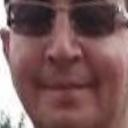

predicted folder: [20]


In [18]:
if __name__ == '__main__':
    NB_CLASSES = 28
    model = getModel(NB_CLASSES)
    image=getIm(8,5)
    model.load_weights('face_net.h5')
    history=model.predict_classes(image)
    print('predicted folder:',history)

## Удачные комбинации

(13,6;20,5;20,8;24,6;25,6;25,16;)
